In [321]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

### 加载数据，查看特征相关信息

In [ ]:
iris = load_iris()     #取得数据，小的数据集用load就可以了，大的数据集要用fetch

In [39]:
iris.feature_names     #数据集特征

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'iris_type',
 'iris_type']

In [45]:
# iris.target_names     #'setosa', 'versicolor', 'virginica'
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris.shape

(150, 4)

In [46]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [49]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [294]:
df_iris.iloc[:,4]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: iris_type, Length: 150, dtype: int32

In [53]:
df_iris['iris_type'] = iris.target
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


aqua 0 setosa
orange 1 versicolor
navy 2 virginica


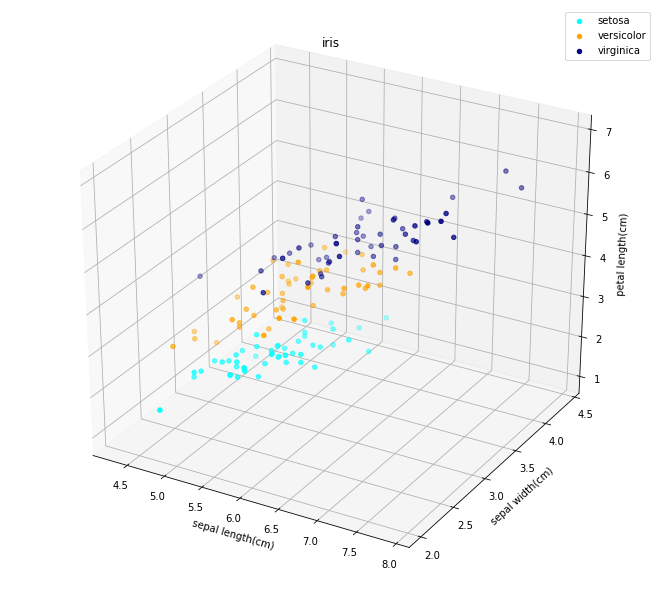

In [87]:
fig = plt.figure(figsize=(9,8))
ax = Axes3D(fig)
for color,i,iris_type in zip(['aqua','orange','Navy'],[0,1,2],iris.target_names):
    print(color,i,iris_type)
    ax.scatter3D(df_iris[df_iris['iris_type']==i]['sepal length (cm)'],
                df_iris[df_iris['iris_type']==i]['sepal width (cm)'],
                df_iris[df_iris['iris_type']==i]['petal length (cm)'],c=color,label=iris_type)
ax.set_xlabel('sepal length(cm)')
ax.set_ylabel('sepal width(cm)')
ax.set_zlabel('petal length(cm)')
ax.set_title('iris')
plt.legend()
plt.show()

aqua 0 setosa
orange 1 versicolor
navy 2 virginica


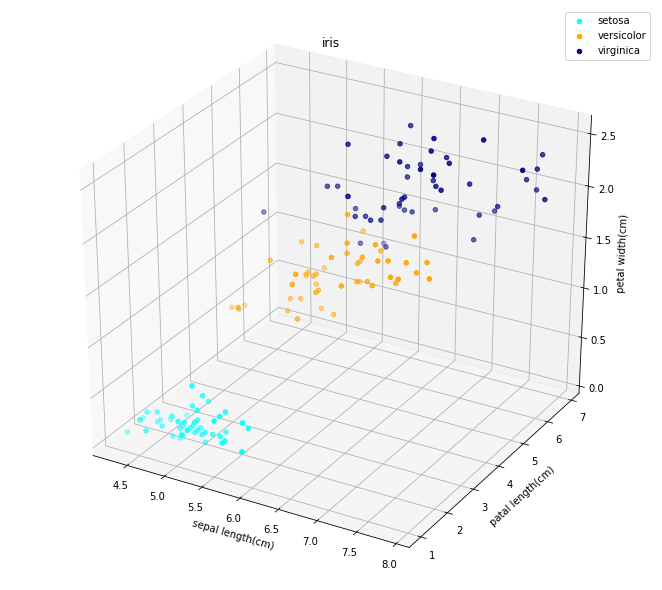

In [88]:
fig = plt.figure(figsize=(9,8))
ax = Axes3D(fig)
for color,i,iris_type in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    print(color,i,iris_type)
    ax.scatter3D(df_iris[df_iris['iris_type']==i]['sepal length (cm)'],
                df_iris[df_iris['iris_type']==i]['petal length (cm)'],
                df_iris[df_iris['iris_type']==i]['petal width (cm)'],c=color,label=iris_type)
ax.set_xlabel('sepal length(cm)')
ax.set_ylabel('petal length(cm)')
ax.set_zlabel('petal width(cm)')
ax.set_title('iris')
plt.legend()
plt.show()

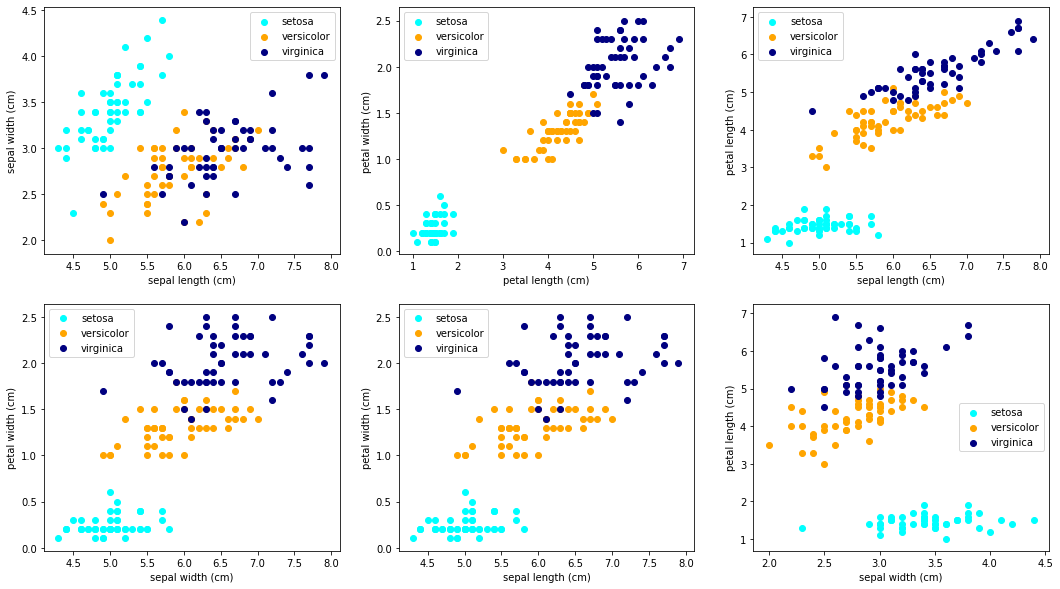

In [97]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(231)
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('sepal width (cm)')
for color,iris_type,label in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    ax1.scatter(df_iris[df_iris.iris_type==iris_type]['sepal length (cm)'],df_iris[df_iris.iris_type==iris_type]['sepal width (cm)'],
                c=color,label=label)
ax1.legend()

ax1 = fig.add_subplot(232)
ax1.set_xlabel('petal length (cm)')
ax1.set_ylabel('petal width (cm)')
for color,iris_type,label in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    ax1.scatter(df_iris[df_iris.iris_type==iris_type]['petal length (cm)'],df_iris[df_iris.iris_type==iris_type]['petal width (cm)'],
                c=color,label=label)
ax1.legend()

ax1 = fig.add_subplot(233)
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('petal length (cm)')
for color,iris_type,label in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    ax1.scatter(df_iris[df_iris.iris_type==iris_type]['sepal length (cm)'],df_iris[df_iris.iris_type==iris_type]['petal length (cm)'],
                c=color,label=label)
ax1.legend()

ax1 = fig.add_subplot(234)
ax1.set_xlabel('sepal width (cm)')
ax1.set_ylabel('petal width (cm)')
for color,iris_type,label in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    ax1.scatter(df_iris[df_iris.iris_type==iris_type]['sepal length (cm)'],df_iris[df_iris.iris_type==iris_type]['petal width (cm)'],
                c=color,label=label)
ax1.legend()

ax1 = fig.add_subplot(235)
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('petal width (cm)')
for color,iris_type,label in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    ax1.scatter(df_iris[df_iris.iris_type==iris_type]['sepal length (cm)'],df_iris[df_iris.iris_type==iris_type]['petal width (cm)'],
                c=color,label=label)
ax1.legend()

ax1 = fig.add_subplot(236)
ax1.set_xlabel('sepal width (cm)')
ax1.set_ylabel('petal length (cm)')
for color,iris_type,label in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    ax1.scatter(df_iris[df_iris.iris_type==iris_type]['sepal width (cm)'],df_iris[df_iris.iris_type==iris_type]['petal length (cm)'],
                c=color,label=label)
ax1.legend()
plt.show()

### KMeans++预测分型

In [107]:
iris_mess = np.random.permutation(df_iris)
df_iris_mess = pd.DataFrame(iris_mess,columns=df_iris.columns)
df_iris_mess['iris_type'] = df_iris_mess['iris_type'].astype(int)     #astype不会在原有数据集上修改
df_iris_mess.head(25)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,7.9,3.8,6.4,2.0,2
1,6.4,2.8,5.6,2.2,2
2,4.3,3.0,1.1,0.1,0
3,6.5,3.0,5.5,1.8,2
4,4.9,3.1,1.5,0.2,0
5,6.9,3.1,5.4,2.1,2
6,6.7,3.3,5.7,2.5,2
7,6.4,3.1,5.5,1.8,2
8,5.6,3.0,4.5,1.5,1
9,5.5,2.5,4.0,1.3,1


In [112]:
x = df_iris_mess[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,7.9,3.8,6.4,2.0
1,6.4,2.8,5.6,2.2
2,4.3,3.0,1.1,0.1
3,6.5,3.0,5.5,1.8
4,4.9,3.1,1.5,0.2
...,...,...,...,...
145,4.6,3.1,1.5,0.2
146,6.1,2.9,4.7,1.4
147,4.9,3.0,1.4,0.2
148,5.4,3.4,1.7,0.2


In [218]:
y = df_iris_mess['iris_type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=445)     #x_train,x_test,y_train,y_test 顺序不能乱
x_train.shape

(120, 4)

In [219]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
44,6.3,3.4,5.6,2.4
116,5.5,3.5,1.3,0.2
35,4.6,3.2,1.4,0.2
131,5.7,2.5,5.0,2.0
46,6.8,3.2,5.9,2.3
...,...,...,...,...
98,7.3,2.9,6.3,1.8
111,6.6,3.0,4.4,1.4
41,6.9,3.1,5.1,2.3
104,5.6,2.8,4.9,2.0


In [220]:
std_scaler = StandardScaler()
std_x_train = std_scaler.fit_transform(x_train)
std_x_test = std_scaler.fit_transform(x_test)

In [320]:
std_x_train

array([[ 0.57859502,  0.83115161,  1.0537494 ,  1.60349872],
       [-0.39417419,  1.05528238, -1.37580686, -1.27821443],
       [-1.48853954,  0.38289007, -1.31930555, -1.27821443],
       [-0.15098189, -1.18602533,  0.71474155,  1.07955087],
       [ 1.18657577,  0.38289007,  1.22325332,  1.47251176],
       [ 2.28094113, -0.51363302,  1.67526379,  1.07955087],
       [ 1.06497962, -0.06537147,  0.71474155,  0.68658999],
       [-1.12375109, -0.06537147, -1.31930555, -1.27821443],
       [ 0.21380656, -1.85841764,  0.71474155,  0.42461607],
       [-0.39417419,  2.62419778, -1.31930555, -1.27821443],
       [ 0.57859502, -1.63428687,  0.3757337 ,  0.16264214],
       [-0.75896264,  2.40006701, -1.26280424, -1.40920139],
       [-1.24534724,  0.1587593 , -1.20630293, -1.27821443],
       [ 2.15934498, -0.06537147,  1.61876248,  1.21053784],
       [-1.73173185,  0.38289007, -1.37580686, -1.27821443],
       [-1.12375109,  0.1587593 , -1.26280424, -1.27821443],
       [ 1.06497962,  0.

In [221]:
model = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,precompute_distances=True,tol=1e-4,n_jobs=-2,random_state=895,copy_x=True)
model = model.fit(std_x_train,y_train)

In [222]:
y_predict = model.predict(std_x_test)
y_predict.reshape(1,30)

array([[2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1,
        2, 0, 1, 1, 2, 1, 2, 0]])

In [223]:
y_test.values

array([1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2,
       2, 0, 1, 1, 2, 1, 2, 0])

In [226]:
count  = 0
for i in range(0,30):
    if list(y_predict)[i] == list(y_test.values)[i]:
#         print(f'correct match:{i}')
        count += 1
print(f'{count} predict right,accuracy:{count/len(y_test.values)*100}%')

27 predict right,accuracy:90.0%


### 降维

In [229]:
cov_mat = np.cov(x_train.T)
cov_mat

array([[ 0.68201611, -0.03768557,  1.26881092,  0.51605112],
       [-0.03768557,  0.2007388 , -0.33590336, -0.1252556 ],
       [ 1.26881092, -0.33590336,  3.15876471,  1.31816387],
       [ 0.51605112, -0.1252556 ,  1.31816387,  0.58773039]])

In [230]:
eig_vals,eig_vecs = np.linalg.eig(cov_mat)     #从协方差矩阵求特征值与特征向量

In [239]:
print(f'eig_vals:{eig_vals},\n eig_vecs:\n{eig_vecs}')

eig_vals:[4.2712358 0.2564646 0.0794997 0.0220499],
 eig_vecs:
[[ 0.35601162 -0.65411494 -0.6061497   0.27923451]
 [-0.08518895 -0.73390781  0.61304868 -0.27980974]
 [ 0.85818684  0.16815936  0.10438021 -0.47364813]
 [ 0.35988042  0.07235606  0.49584134  0.78701464]]


In [241]:
eig_map = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_map

[(4.271235803924985,
  array([ 0.35601162, -0.08518895,  0.85818684,  0.35988042])),
 (0.25646459648649284,
  array([-0.65411494, -0.73390781,  0.16815936,  0.07235606])),
 (0.0794996958935935,
  array([-0.6061497 ,  0.61304868,  0.10438021,  0.49584134])),
 (0.022049903694922702,
  array([ 0.27923451, -0.27980974, -0.47364813,  0.78701464]))]

In [243]:
eig_map.sort(key = lambda x:x[0],reverse=True)     #特征值从大到小排序
eig_map

[(4.271235803924985,
  array([ 0.35601162, -0.08518895,  0.85818684,  0.35988042])),
 (0.25646459648649284,
  array([-0.65411494, -0.73390781,  0.16815936,  0.07235606])),
 (0.0794996958935935,
  array([-0.6061497 ,  0.61304868,  0.10438021,  0.49584134])),
 (0.022049903694922702,
  array([ 0.27923451, -0.27980974, -0.47364813,  0.78701464]))]

In [250]:
tot = sum(eig_vals)
eig_summary = 0.0
per_each_vec = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(per_each_vec)
for i,eig_value in enumerate(eig_vals):
    eig_summary += eig_value
    if eig_summary/tot > 0.95:
        print(f'最终留取特征向量个数：{i+1}')
        break

[92.26625919803404, 5.540089571453112, 1.7173342527103441, 0.4763169778025108]
最终留取特征向量个数：2


### PCA

In [336]:
mm_scaler = MinMaxScaler()
nor_x_train = mm_scaler.fit_transform(x_train)     #归一化效果似乎比标准化好？不明白
nor_x_test = mm_scaler.fit_transform(x_test)

In [337]:
x_reduced_train = PCA(n_components=2).fit_transform(nor_x_train)
print(x_reduced_train)
x_reduced_test = PCA(n_components=2).fit_transform(std_x_test)
print(x_reduced_test)

[[ 5.58358106e-01  1.61633747e-01]
 [-5.83635307e-01  1.74702760e-01]
 [-6.71610365e-01 -5.54787215e-02]
 [ 3.67382622e-01 -2.39065653e-01]
 [ 6.40118435e-01  1.50233916e-01]
 [ 7.84708129e-01  1.13382098e-01]
 [ 3.86346655e-01  8.14320942e-02]
 [-6.20249677e-01 -9.07738768e-02]
 [ 2.91651501e-01 -3.04850700e-01]
 [-6.16636791e-01  4.33995204e-01]
 [ 2.08964028e-01 -2.18764203e-01]
 [-6.65713375e-01  3.57827197e-01]
 [-6.18717705e-01 -6.89600839e-02]
 [ 7.75627596e-01  1.74593708e-01]
 [-7.07950264e-01 -8.03846108e-02]
 [-6.16085477e-01 -5.47412046e-02]
 [ 2.38029837e-01  1.29737836e-01]
 [-6.06225106e-01  3.91379327e-02]
 [-7.55926590e-01 -1.64147531e-01]
 [-5.85993064e-01  4.01054628e-01]
 [ 7.90140339e-01  1.90833718e-01]
 [ 3.01682305e-01 -1.52918756e-01]
 [ 3.24701138e-01  3.01583276e-03]
 [-6.79008941e-01 -1.93191786e-01]
 [ 4.19629868e-01  7.22868248e-02]
 [ 5.97982963e-02 -2.10123019e-01]
 [-6.95561702e-01 -1.54804535e-01]
 [ 2.97695796e-01 -1.21322194e-01]
 [-5.08145591e-01  3

0
1
2


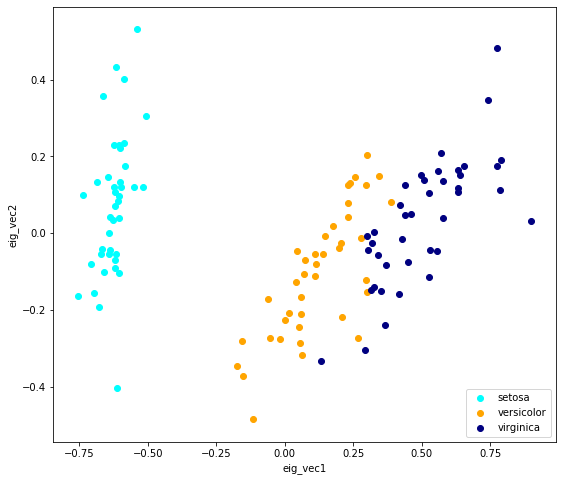

In [338]:
fig = plt.figure(figsize=(9,8))
#暂时合体
y_train1 = y_train.astype(str)
y_test1 = y_test.astype(str)
reduce_train_sym = np.column_stack((x_reduced_train,y_train1))
reduce_test_sym = np.column_stack((x_reduced_test,y_test1))
reduce_sym = np.row_stack((reduce_train_sym,reduce_test_sym))
pd_reduce_iris = pd.DataFrame(reduce_train_sym)

plt.xlabel('eig_vec1')
plt.ylabel('eig_vec2')
for color,i,label_name in zip(['aqua','orange','navy'],[0,1,2],iris.target_names):
    print(i)
    plt.scatter(pd_reduce_iris[pd_reduce_iris.iloc[:,2]==str(i)].iloc[:,0],
                pd_reduce_iris[pd_reduce_iris.iloc[:,2]==str(i)].iloc[:,1],c=color,label=label_name)
plt.legend(loc='lower right')
plt.show()

In [354]:
model = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,precompute_distances=True,tol=1e-04,n_jobs=-2,random_state=5,copy_x=True)
model.fit(nor_x_train,y_train)     #不理解为何预测结果与random_state有这么大的关系（random_state为895时准确率约26.7%）

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-2, precompute_distances=True,
       random_state=5, tol=0.0001, verbose=0)

In [355]:
y_predict1 = model.predict(nor_x_test)
y_predict1

array([1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 0])

In [356]:
count2  = 0
for i in range(0,30):
    if list(y_predict1)[i] == list(y_test.values)[i]:
        print(f'correct match:{i}')
        count2 += 1
print(f'{count2} predict right,accuracy:{count2/len(y_test.values)*100}%')

correct match:0
correct match:1
correct match:2
correct match:3
correct match:4
correct match:5
correct match:6
correct match:7
correct match:8
correct match:9
correct match:10
correct match:11
correct match:13
correct match:14
correct match:15
correct match:16
correct match:17
correct match:18
correct match:19
correct match:20
correct match:22
correct match:23
correct match:24
correct match:25
correct match:26
correct match:27
correct match:28
correct match:29
28 predict right,accuracy:93.33333333333333%
